In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy
import statistics as stats
from scipy.stats import norm
import matplotlib_inline

In [3]:
# Improve quality of the plots
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Set the style of the plot
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/2D_MV_200wells.csv")
df.head()

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


In [5]:
por = df['porosity'].values
por_mean = np.mean(por)
por_median = np.median(por)
por_mod = stats.mode(por)
por_geometric = scipy.stats.mstats.gmean(por)
por_hmean = scipy.stats.mstats.hmean(por)

<Axes: >

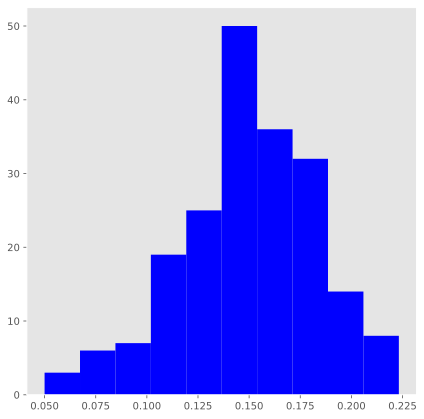

In [6]:
plt.figure(figsize=(7, 7))
df['porosity'].hist(grid = False, color = 'blue')

<Axes: >

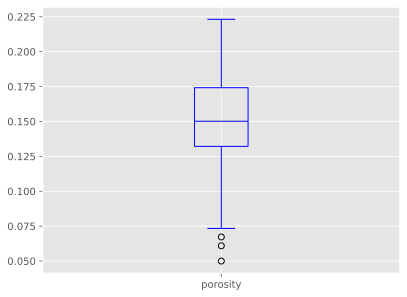

In [18]:
df['porosity'].plot(kind = 'box', color='blue')

In [7]:
print(f'Porosity mean is {round(por_mean, 2)}')
print(f'Porosity mediam is {round(por_median, 2)}')
print(f'Porosity mode is {round(por_mod, 2)}')
print(f'Porosity geometric mean is {round(por_geometric, 2)}')
print(f'Porosity harmonic mean is {round(por_hmean, 2)}')

Porosity mean is 0.15
Porosity mediam is 0.15
Porosity mode is 0.14
Porosity geometric mean is 0.15
Porosity harmonic mean is 0.14


In [8]:
por_varp = stats.pvariance(por)
por_sdp = stats.pstdev(por)
por_var = stats.pvariance(por)
por_sd = stats.pstdev(por)

In [9]:
print(f'Porosity population variance is {round(por_varp, 4)}')
print(f'Porosity population sd is {round(por_sdp, 4)}')
print(f'Porosity sample variance is {round(por_varp, 4)}')
print(f'Porosity sample sd is {round(por_sd, 4)}')

Porosity population variance is 0.0011
Porosity population sd is 0.0329
Porosity sample variance is 0.0011
Porosity sample sd is 0.0329


Range = $max(X) - min(X)$

In [10]:
por_range = por.max() - por.min()
print(f'Porosity range is {round(por_range, 2)}')

Porosity range is 0.17


Inter Quartile Range

In [11]:
por_iqr = scipy.stats.iqr(por)
print(f'Porosity interquartile range is {round(por_iqr,2)}')

Porosity interquartile range is 0.04


Tukey test for Outliers

In [12]:
p25, p75 = np.percentile(por, [25, 75])
lower_fence = p25 - por_iqr * 1.5
upper_fence = p75 + por_iqr * 1.5

In [13]:
print(f'fence [{round(lower_fence, 2)}, {round(upper_fence, 2)}]' )

fence [0.07, 0.24]


In [14]:
por[(por < lower_fence) | (por > upper_fence)]

array([0.06726, 0.05   , 0.06092])

In [15]:
np.where((por < lower_fence) | (por > upper_fence))[0]

array([110, 152, 198], dtype=int64)

Pearson Mode Skewness

In [16]:
por_skew = (por_mean - por_mod) / por_sd
print(f'Porosity mode skew is {round(por_skew, 2)}')

Porosity mode skew is 0.38


Population Skew

In [17]:
por_cm = scipy.stats.moment(por, 3) / (por_sdp**3)
print(f'Porosity skew is {round(por_cm, 2)}')

Porosity skew is -0.34


CDF distribution

In [19]:
por_sort = np.sort(por)
p = np.arange(1, len(por) + 1) / len(por)

Text(0.5, 1.0, 'Nonparametric Porosity CDF')

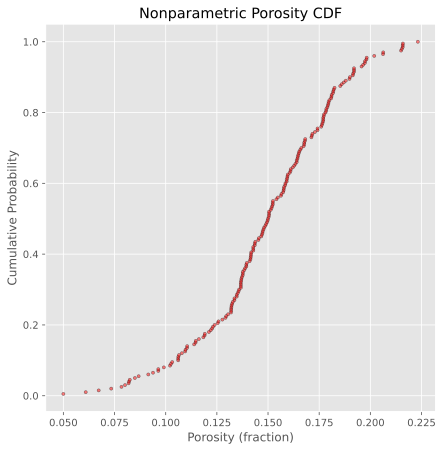

In [25]:
plt.figure(figsize = (7, 7))
plt.scatter(por_sort, p, color = 'red', edgecolors = 'black', s = 10, alpha = 0.5)
plt.xlabel('Porosity (fraction)')
plt.ylabel('Cumulative Probability') 
plt.title('Nonparametric Porosity CDF')

Fitting normal distribution

In [35]:
fit_mean, fit_std = norm.fit(por)
p_norm = norm.cdf(por_sort, loc = fit_mean, scale = fit_std)

Text(0.5, 1.0, 'Nonparametric Porosity CDF')

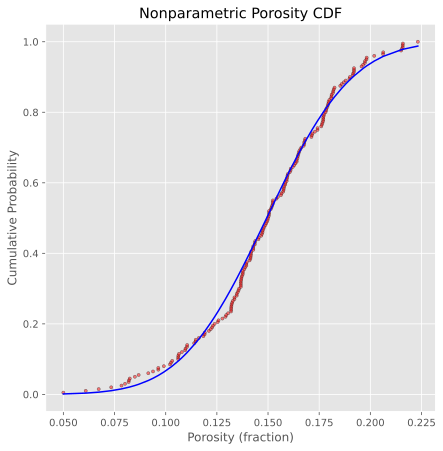

In [38]:
plt.figure(figsize = (7, 7))
plt.scatter(por_sort, p, color = 'red', edgecolors = 'black', s = 10, alpha = 0.5)
plt.plot(por_sort, p_norm, color = 'blue')
plt.xlabel('Porosity (fraction)')
plt.ylabel('Cumulative Probability') 
plt.title('Nonparametric Porosity CDF')